In [1]:
import pandas as pd

In [2]:
my_api_key = '6a814694baa14154a99cd13ce60ad8a5'

In [2]:
from twelvedata import TDClient

td = TDClient(my_api_key)
ts = td.time_series(symbol="AAPL", interval="1day", outputsize = 500).as_pandas()

In [3]:
ts.head()

,open,high,low,close,volume
datetime,,,,,
2023-10-06,173.80000,177.99001,173.17999,177.49001,48393727
2023-10-05,173.78999,175.45000,172.67999,174.91000,48494400
2023-10-04,171.09000,174.21001,170.97000,173.66000,53020300
2023-10-03,172.25999,173.63000,170.82001,172.39999,49594600
2023-10-02,171.22000,174.30000,170.92999,173.75000,52164500


In [4]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-10-06 to 2021-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    500 non-null    float64
 1   high    500 non-null    float64
 2   low     500 non-null    float64
 3   close   500 non-null    float64
 4   volume  500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.4 KB


In [5]:
ts.tail()

,open,high,low,close,volume
datetime,,,,,
2021-10-18,143.44501,146.84000,143.16000,146.55000,85589000
2021-10-15,143.77000,144.89500,143.50999,144.84000,67940000
2021-10-14,142.11000,143.88000,141.50999,143.75999,69907000
2021-10-13,141.23500,141.39999,139.20000,140.91000,78763000
2021-10-12,143.23000,143.25000,141.04010,141.50999,73036000


In [7]:
ts['datetime'] = ts.index

In [10]:
ts.head()

,open,high,low,close,volume,datetime
datetime,,,,,,
2023-10-06,173.80000,177.99001,173.17999,177.49001,48393727,2023-10-06
2023-10-05,173.78999,175.45000,172.67999,174.91000,48494400,2023-10-05
2023-10-04,171.09000,174.21001,170.97000,173.66000,53020300,2023-10-04
2023-10-03,172.25999,173.63000,170.82001,172.39999,49594600,2023-10-03
2023-10-02,171.22000,174.30000,170.92999,173.75000,52164500,2023-10-02


In [11]:
ts = ts.loc[ts['datetime']>'2022-06-17']

In [12]:
ts.head()

,open,high,low,close,volume,datetime
datetime,,,,,,
2023-10-06,173.80000,177.99001,173.17999,177.49001,48393727,2023-10-06
2023-10-05,173.78999,175.45000,172.67999,174.91000,48494400,2023-10-05
2023-10-04,171.09000,174.21001,170.97000,173.66000,53020300,2023-10-04
2023-10-03,172.25999,173.63000,170.82001,172.39999,49594600,2023-10-03
2023-10-02,171.22000,174.30000,170.92999,173.75000,52164500,2023-10-02


In [13]:
ts.tail()

,open,high,low,close,volume,datetime
datetime,,,,,,
2022-06-27,142.69501,143.49001,140.96500,141.66000,70208000,2022-06-27
2022-06-24,139.89999,141.91000,139.77000,141.66000,89117000,2022-06-24
2022-06-23,136.82001,138.59000,135.63000,138.27000,72434000,2022-06-23
2022-06-22,134.78999,137.75999,133.91000,135.35001,73409000,2022-06-22
2022-06-21,133.42000,137.06000,133.32001,135.87000,81000000,2022-06-21


In [30]:
ts = ts.iloc[::-1]

In [32]:
ts = ts.reset_index(drop=True)

In [36]:
ts.rename(columns = {'datetime': 'Date', 'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace = True)

In [37]:
ts.head()

,Date,Open,High,Low,Close,Volume
0,2022-06-21,133.42000,137.06000,133.32001,135.87000,81000000
1,2022-06-22,134.78999,137.75999,133.91000,135.35001,73409000
2,2022-06-23,136.82001,138.59000,135.63000,138.27000,72434000
3,2022-06-24,139.89999,141.91000,139.77000,141.66000,89117000
4,2022-06-27,142.69501,143.49001,140.96500,141.66000,70208000


In [47]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    327 non-null    datetime64[ns]
 1   Open    327 non-null    float64       
 2   High    327 non-null    float64       
 3   Low     327 non-null    float64       
 4   Close   327 non-null    float64       
 5   Volume  327 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 15.5 KB


In [50]:
ts['Date'] = ts['Date'].dt.date

In [51]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    327 non-null    object 
 1   Open    327 non-null    float64
 2   High    327 non-null    float64
 3   Low     327 non-null    float64
 4   Close   327 non-null    float64
 5   Volume  327 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 15.5+ KB


In [16]:
ts.to_csv('aapl23.csv', index = False)

In [17]:
datetime = ts.pop('datetime')

In [18]:
ts.insert(0, 'datetime', datetime)

In [19]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 2023-10-06 to 2022-06-21
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  327 non-null    datetime64[ns]
 1   open      327 non-null    float64       
 2   high      327 non-null    float64       
 3   low       327 non-null    float64       
 4   close     327 non-null    float64       
 5   volume    327 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 17.9 KB


In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('AAPL.csv')

In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [26]:
df.pop('Adj Close')

0          0.100178
1          0.094952
2          0.087983
3          0.090160
4          0.092774
            ...    
10463    131.880005
10464    132.759995
10465    135.429993
10466    130.059998
10467    131.559998
Name: Adj Close, Length: 10468, dtype: float64

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10468 non-null  object 
 1   Open    10468 non-null  float64
 2   High    10468 non-null  float64
 3   Low     10468 non-null  float64
 4   Close   10468 non-null  float64
 5   Volume  10468 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 490.8+ KB


In [52]:
data = pd.concat([df, ts])

In [53]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [54]:
data.tail()

,Date,Open,High,Low,Close,Volume
322,2023-10-02,171.22000,174.30000,170.92999,173.75000,52164500
323,2023-10-03,172.25999,173.63000,170.82001,172.39999,49594600
324,2023-10-04,171.09000,174.21001,170.97000,173.66000,53020300
325,2023-10-05,173.78999,175.45000,172.67999,174.91000,48494400
326,2023-10-06,173.80000,177.99001,173.17999,177.49001,48393727


In [55]:
data = data.reset_index(drop = True)

In [56]:
data.tail()

,Date,Open,High,Low,Close,Volume
10790,2023-10-02,171.22000,174.30000,170.92999,173.75000,52164500
10791,2023-10-03,172.25999,173.63000,170.82001,172.39999,49594600
10792,2023-10-04,171.09000,174.21001,170.97000,173.66000,53020300
10793,2023-10-05,173.78999,175.45000,172.67999,174.91000,48494400
10794,2023-10-06,173.80000,177.99001,173.17999,177.49001,48393727


In [57]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [58]:
data.tail()

,Date,Open,High,Low,Close,Volume
10790,2023-10-02,171.22000,174.30000,170.92999,173.75000,52164500
10791,2023-10-03,172.25999,173.63000,170.82001,172.39999,49594600
10792,2023-10-04,171.09000,174.21001,170.97000,173.66000,53020300
10793,2023-10-05,173.78999,175.45000,172.67999,174.91000,48494400
10794,2023-10-06,173.80000,177.99001,173.17999,177.49001,48393727


In [46]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [59]:
data.to_csv('AAPL.csv', index = False)

In [ ]:
#R4Z0Rx

In [3]:
from twelvedata import TDClient

td = TDClient(my_api_key)
ts = td.time_series(symbol='GOOGL', interval="1day", outputsize = 3500).as_pandas()

In [4]:
ts.head()

,open,high,low,close,volume
datetime,,,,,
2023-10-11,138.58000,141.11000,138.58000,140.55000,25850200
2023-10-10,138.50000,139.72000,137.33000,138.06000,27786600
2023-10-09,136.94000,138.94000,135.61000,138.42000,19278100
2023-10-06,134.00999,138.16000,134.00999,137.58000,27583200
2023-10-05,135.07001,135.49001,133.45000,135.07001,19832600


In [5]:
ts.tail()

,open,high,low,close,volume
datetime,,,,,
2009-11-19,14.35861,14.36436,14.26426,14.33909,86633280
2009-11-18,14.43068,14.48398,14.31607,14.43068,61922016
2009-11-17,14.38614,14.45195,14.35736,14.45170,76591332
2009-11-16,14.38939,14.43919,14.33383,14.42142,87880032
2009-11-13,14.24650,14.32708,14.17943,14.31557,66605328


In [6]:
import matplotlib.pyplot as plt

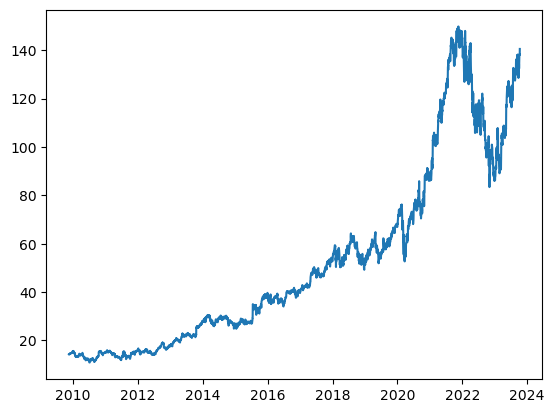

In [7]:
plt.plot(ts['close'])

In [8]:
ts.to_csv('GOOGL.csv')

In [20]:
from twelvedata import TDClient

td = TDClient(my_api_key)
ts = td.time_series(symbol='TSLA', interval="1day", outputsize = 3500).as_pandas()

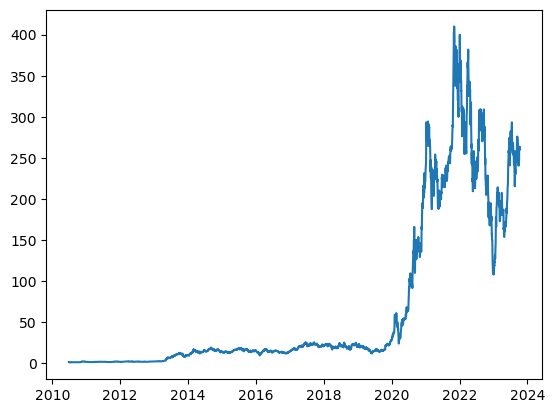

In [21]:
plt.plot(ts['close'])

In [24]:
ts.loc[ts['close']>10]

,open,high,low,close,volume
datetime,,,,,
2023-10-11,266.20001,268.60001,260.89999,262.98999,103516700
2023-10-10,257.75000,268.94000,257.64999,263.62000,122656000
2023-10-09,255.31000,261.35999,252.05000,259.67001,101377900
2023-10-06,253.98000,261.64999,250.64999,260.53000,117947000
2023-10-05,260.00000,263.60001,256.25000,260.04999,119159200
...,...,...,...,...,...
2013-08-26,11.01000,11.53000,10.68000,10.95000,362566816
2013-08-23,10.47000,10.82000,10.33000,10.79000,193977824
2013-08-22,9.95000,10.50000,9.88000,10.47000,158886016


In [12]:
ts.index

DatetimeIndex(['2023-10-11', '2023-10-10', '2023-10-09', '2023-10-06',
               '2023-10-05', '2023-10-04', '2023-10-03', '2023-10-02',
               '2023-09-29', '2023-09-28',
               ...
               '2009-11-30', '2009-11-27', '2009-11-25', '2009-11-24',
               '2009-11-23', '2009-11-20', '2009-11-19', '2009-11-18',
               '2009-11-17', '2009-11-16'],
              dtype='datetime64[ns]', name='datetime', length=3500, freq=None)

In [22]:
ts.to_csv('TSLA.csv')